# 弄支股票來畫 K 線

某天想讀個真實股票資料來玩耍一下。

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

注意 Pandas 以前在 `pandas.io` 下有 `data`, `wb` 等讀取外部資料, 現在都變成獨立套件。

    pandas_datareader
    
在 Anaconda 下可以這樣安裝:

    conda install pandas-datareader
    
我們還用 Python 標準套件 `datetime` 來表示日期。

In [3]:
import pandas_datareader.data as web
import datetime

去查查用來畫 K 線的套件有幾個, 隨便先拿一個來試試。

In [4]:
from matplotlib.finance import candlestick2_ochl

In [5]:
symbol = "AAPL"
day_start = datetime.datetime(2016,10,1)
day_end = datetime.datetime(2016,10,31)

In [6]:
df = web.DataReader(symbol, 'yahoo', day_start, day_end)

偷看一下手冊, 我們讓怎麼用...

    matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='k', colordown='r', alpha=0.75)

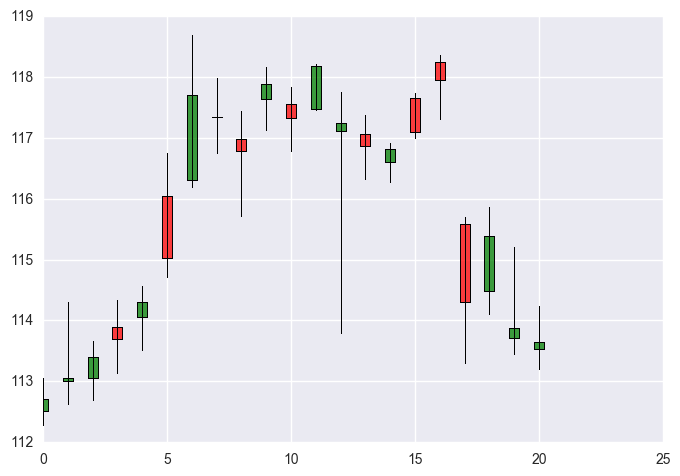

In [7]:
fig, ax = plt.subplots()
candlestick2_ochl(ax, df.Open.values, df.Close.values, df.High.values, df.Low.values, width=0.4, colorup='r', colordown='g')

## 日期考慮進去的 `candlestick_ohlc`

這裡我們找個更方便印出日期的畫法。

In [8]:
from matplotlib.finance import candlestick_ohlc

In [9]:
symbol = "AAPL"
day_start = datetime.datetime(2016,9,1)
day_end = datetime.datetime(2016,10,31)

In [10]:
df2 = web.DataReader(symbol, 'yahoo', day_start, day_end)

我們再來看個說明。

    matplotlib.finance.candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)

這裡比較特別的是 `quotes` 這個部份, 我們再看看說明。

    quotes : sequence of (time, open, high, low, close, ...) sequences

很遺憾日期我們要 matplotlib 看得懂的樣子, 需要用 `date2num` 轉換, 偏偏 `date2num` 也只懂 Python `datetime` 的格式, 所以 `pandas` 要先轉成那樣的格式。

In [11]:
import matplotlib.dates as mdate

In [12]:
df2["date_num"] = mdate.date2num(df2.index.to_pydatetime())

In [13]:
df2.head()

,Open,High,Low,Close,Volume,Adj Close,date_num
Date,,,,,,,
2016-09-01,106.139999,106.800003,105.620003,106.730003,26701500,106.184827,736208.0
2016-09-02,107.699997,108.000000,106.820000,107.730003,26802500,107.179719,736209.0
2016-09-06,107.900002,108.300003,107.510002,107.699997,26880400,107.149865,736213.0
2016-09-07,107.830002,108.760002,107.070000,108.360001,42364300,107.806498,736214.0
2016-09-08,107.250000,107.269997,105.239998,105.519997,53002000,104.981001,736215.0


In [14]:
quotes = df2[['date_num', 'Open', 'High', 'Low', 'Close']].values

再來我們想在只印每週一的日期

In [15]:
day_formatter = mdate.DateFormatter("%b %d") # Oct 15 etc

In [16]:
mondays = mdate.WeekdayLocator(mdate.MONDAY)

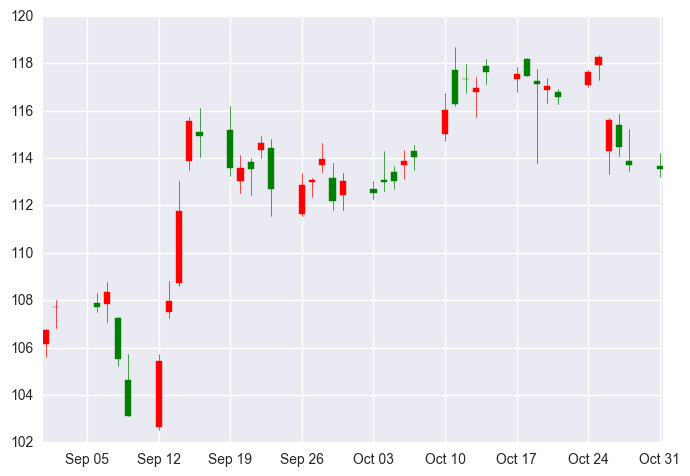

In [17]:
plt.figure()
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(day_formatter)
candlestick_ohlc(ax, quotes, width=0.6, colorup='r', colordown='g');

## 移動的 K 線!

用互動功能再做一次, 時間拉長到一年, 每次只顯示個 25 天。

In [18]:
symbol = "AAPL"
day_start = datetime.datetime(2015,10,1)
day_end = datetime.datetime(2016,10,31)

In [19]:
df3 = web.DataReader(symbol, 'yahoo', day_start, day_end)

In [20]:
period = df3.Open.count()

In [22]:
df3["date_num"] = mdate.date2num(df3.index.to_pydatetime())

In [23]:
quotes = df3[['date_num', 'Open', 'High', 'Low', 'Close']].values

In [24]:
from ipywidgets import interact

In [25]:
def klines(m):
    plt.figure()
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_major_formatter(day_formatter)
    candlestick_ohlc(ax, quotes[m:m+25], width=0.6, colorup='r', colordown='g');

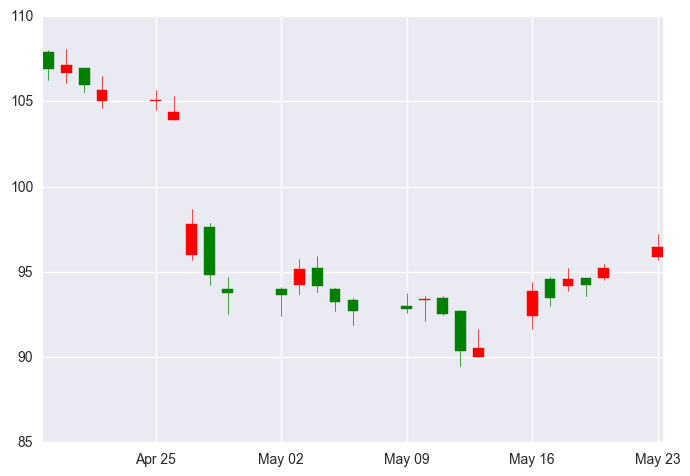

In [26]:
interact(klines, m=(0,period-25));